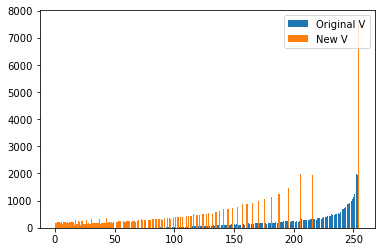

In [19]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# filename = "sample01.jpg"
# filename = "sample02.jpeg"
filename = "sample03.jpeg"
# filename = "sample04.jpeg"
# filename = "sample05.jpeg"
# filename = "sample06.jpg"
# filename = "sample07.jpg"
# filename = "sample08.jpg"
save_filename = "HSV_HE_" + filename

# import image and split into HSV arrays
img = Image.open(filename)
img= img.convert('HSV')
img = np.asarray(img)
h = img[:,:,0]
s = img[:,:,1]
v = img[:,:,2]

# Total no. of pixels
height = len(np.asarray(img))
width = len(np.asarray(img)[0])
N_pixels = height * width

# No. of bins
L = 256

# Histogram of V array
histogram_v_array = np.bincount(v.flatten(), minlength=L)

# Probability
P_v_array = histogram_v_array / N_pixels

# Transformation function s_k
s_k_v_array = (L-1) * np.cumsum(P_v_array)

# Equalized histogram
eqhistogram_v_array = np.floor(s_k_v_array).astype(np.uint8)

# flatten image V array into 1D
im_v_flat = np.asarray(v).flatten()

# replace pixel values with values from equalized histogram to equalize
eq_img_v_flat = [eqhistogram_v_array[p] for p in im_v_flat]

# plot old vs new histograam for V array
plt.hist(v.flatten(),bins=L,label='Original V')
plt.hist(eq_img_v_flat,bins=L,label='New V')
plt.legend(loc='upper right')
plt.show()

# reshape equalized pixel values back into original V array shape
eq_img_v_array = np.reshape(np.asarray(eq_img_v_flat), np.asarray(v).shape)

# merge HSV arrays into one and save as a RGB image file
eq_img = np.zeros((height,width,3), 'uint8')
eq_img[:,:,0] = h
eq_img[:,:,1] = s
eq_img[:,:,2] = eq_img_v_array

eq_img = Image.fromarray(eq_img, mode='HSV')
eq_img = eq_img.convert('RGB')
# eq_img.save(save_filename)

In [42]:
# histogram_v_array # old histogram
# P_v_array
# s_k_v_array
# eqhistogram_v_array
# im_v_flat
# eq_img_v_flat
# eq_img_v_array
# np.bincount(eq_img_v_flat, minlength=L)
# v.flatten()
# eq_img

eq_img2 = np.zeros((height,width,3), 'uint8')
eq_img2[:,:,0] = h
eq_img2[:,:,1] = s
eq_img2[:,:,2] = eq_img_v_array



array([142,  49, 255], dtype=uint8)